<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/gaussian_basis_funtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = 'https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.06-gaussian-basis.png'>

- 이 그림을 캡쳐하여
- chatGPT(무료버전)에게
- prompt : "별첨의 내용을 가우시안 기저함수를 사용하여 가상데이터를 fit하고 파이썬 코드를 만들러 시각화 해줘"라고 하면,
- 아래 코드를 만들어 줌

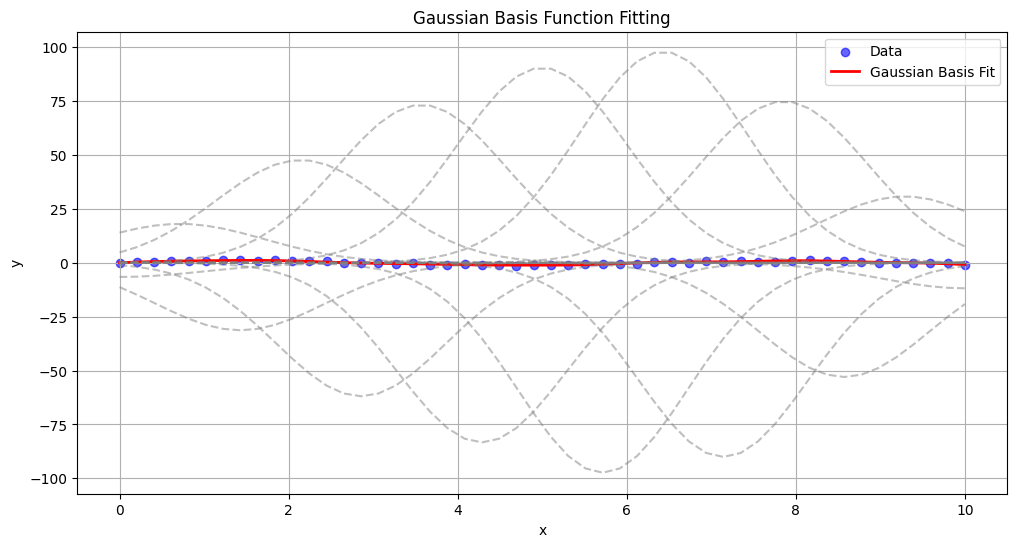

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 가상 데이터 생성
np.random.seed(42)
x = np.linspace(0, 10, 50)  # 입력 데이터
y = np.sin(x) + np.random.normal(scale=0.3, size=x.shape)  # 노이즈 추가

# 2. 가우시안 기저 함수 정의
def gaussian_basis(x, centers, sigma):
    """가우시안 기저 함수 변환"""
    return np.exp(-0.5 * ((x[:, None] - centers[None, :]) / sigma) ** 2)


# 3. 기저 함수 생성
centers = np.linspace(0, 10, 15)  # 중심값들
sigma = 1.0  # 가우시안 너비
X_basis = gaussian_basis(x, centers, sigma)

# 4. 선형 회귀 모델 피팅
weights, _, _, _ = np.linalg.lstsq(X_basis, y, rcond=None)  # 가중치 계산
y_pred = X_basis @ weights  # 예측값

# 5. 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터와 피팅된 데이터
plt.scatter(x, y, label="Data", color="blue", alpha=0.6)
plt.plot(x, y_pred, label="Gaussian Basis Fit", color="red", linewidth=2)

# 가우시안 기저 함수들 시각화
for i, center in enumerate(centers):
    plt.plot(x, weights[i] * gaussian_basis(x, np.array([center]), sigma).flatten(), # Convert [center] to a NumPy array
             color="gray", alpha=0.5, linestyle="--")

# 그래프 설정
plt.title("Gaussian Basis Function Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### y축 단위가 너무 크기 때문에 가우시안분포보다는 y축 데이터를 좀더 시각화하기 위해

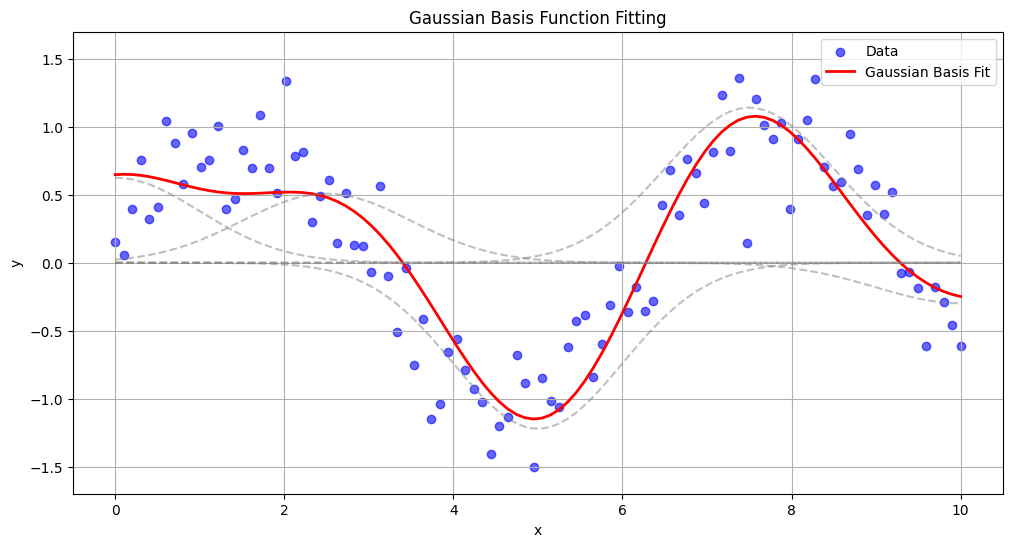

In [2]:
# prompt: y 값의 최소, 최대 값을 설정하는 코드

import numpy as np
import matplotlib.pyplot as plt

# 1. 가상 데이터 생성
np.random.seed(42)
range_of_data = 10
x = np.linspace(0, range_of_data, 100)  # 입력 데이터
y = np.sin(x) + np.random.normal(scale=0.3, size=x.shape)  # 노이즈 추가

# y 값의 최소, 최대 값 설정
y_min = -1.5  # y 값의 최소값 설정
y_max = 1.5   # y 값의 최대값 설정
y = np.clip(y, y_min, y_max) # y 값을 최소, 최대값으로 clip

# 2. 가우시안 기저 함수 정의
def gaussian_basis(x, centers, sigma):
    """가우시안 기저 함수 변환"""
    return np.exp(-0.5 * ((x[:, None] - centers[None, :]) / sigma) ** 2)


# 3. 기저 함수 생성
number_of_centers = 5
centers = np.linspace(0, 10, number_of_centers)  # 중심값들
sigma = 1.0  # 가우시안 너비
X_basis = gaussian_basis(x, centers, sigma)

# 4. 선형 회귀 모델 피팅
weights, _, _, _ = np.linalg.lstsq(X_basis, y, rcond=None)  # 가중치 계산
y_pred = X_basis @ weights  # 예측값

# 5. 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터와 피팅된 데이터
plt.scatter(x, y, label="Data", color="blue", alpha=0.6)
plt.plot(x, y_pred, label="Gaussian Basis Fit", color="red", linewidth=2)

# 가우시안 기저 함수들 시각화
for i, center in enumerate(centers):
    plt.plot(x, weights[i] * gaussian_basis(x, np.array([center]), sigma).flatten(), # Convert [center] to a NumPy array
             color="gray", alpha=0.5, linestyle="--")

# 그래프 설정
plt.title("Gaussian Basis Function Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# y축 범위 설정
plt.ylim(y_min - 0.2, y_max + 0.2) # y축 범위를 약간 더 넓게 설정


plt.show()

In [3]:
# prompt: gradio 를 r기반으로 number_of_centers, sigma 를 입력변수로 하여 시각화하는 코드를 만들어줘

!pip install gradio --quiet

import gradio as gr
import numpy as np
import matplotlib.pyplot as plt

def gaussian_basis(x, centers, sigma):
    """가우시안 기저 함수 변환"""
    return np.exp(-0.5 * ((x[:, None] - centers[None, :]) / sigma) ** 2)

def plot_gaussian_basis(number_of_centers, sigma):
    np.random.seed(42)
    range_of_data = 10
    x = np.linspace(0, range_of_data, 100)
    y = np.sin(x) + np.random.normal(scale=0.3, size=x.shape)
    y_min = -1.5
    y_max = 1.5
    y = np.clip(y, y_min, y_max)

    centers = np.linspace(0, 10, int(number_of_centers))
    X_basis = gaussian_basis(x, centers, sigma)
    weights, _, _, _ = np.linalg.lstsq(X_basis, y, rcond=None)
    y_pred = X_basis @ weights

    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, label="Data", color="blue", alpha=0.6)
    plt.plot(x, y_pred, label="Gaussian Basis Fit", color="red", linewidth=2)

    for i, center in enumerate(centers):
        plt.plot(x, weights[i] * gaussian_basis(x, np.array([center]), sigma).flatten(),
                 color="gray", alpha=0.5, linestyle="--")

    plt.title("Gaussian Basis Function Fitting")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.ylim(y_min - 0.2, y_max + 0.2)

    plt.savefig("gaussian_plot.png") # Save the plot to a file
    return "gaussian_plot.png" # Return the filename


iface = gr.Interface(
    fn=plot_gaussian_basis,
    inputs=[
        gr.Number(label="Number of Centers", value=5),
        gr.Number(label="Sigma", value=1.0),
    ],
    outputs=gr.Image(label="Gaussian Basis Function Plot"),
    title="Gaussian Basis Function Visualization",
    description="Visualize Gaussian basis function fitting with adjustable parameters (simulate 100 sample from 0 to 10)."
)

iface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de5ce8d664c358d3db.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/sp

## [DeepSeek](https://chat.deepseek.com/)
- https://huggingface.co/deepseek-ai/DeepSeek-V3
<img src ='https://huggingface.co/deepseek-ai/DeepSeek-V3/resolve/main/figures/benchmark.png'>

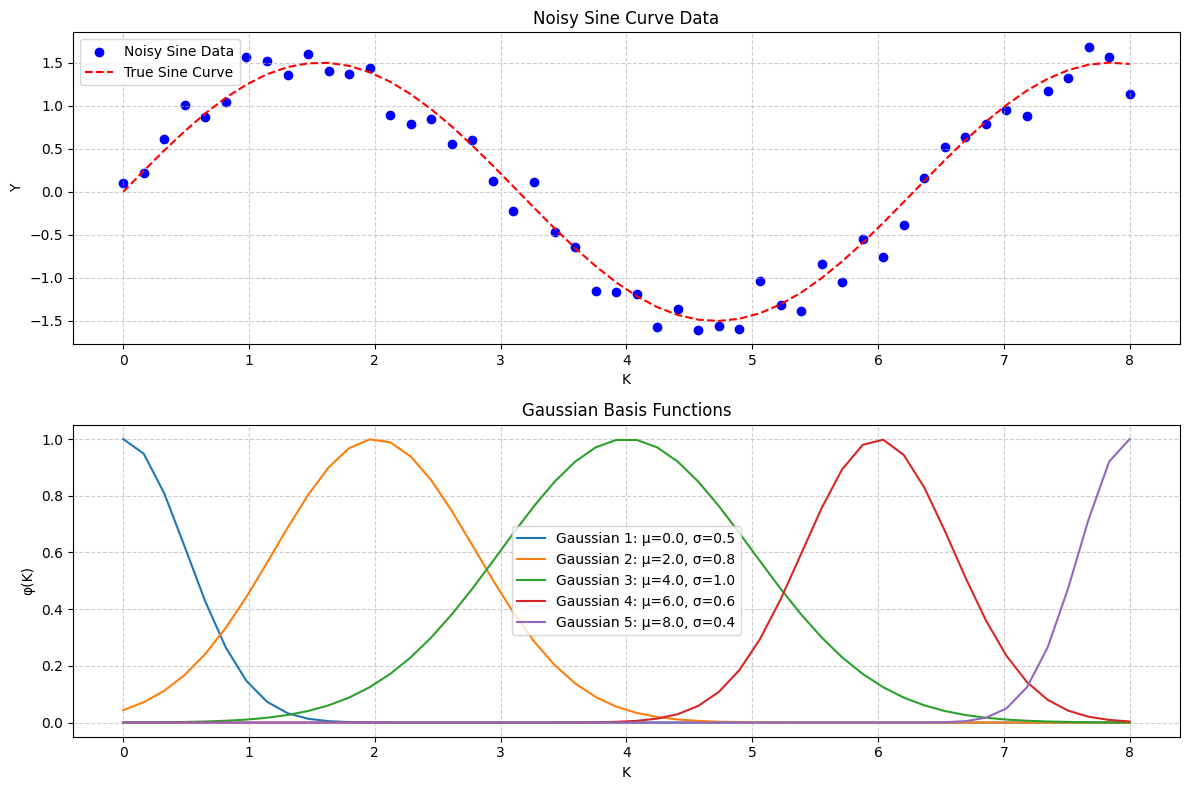

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 사인곡선 형태의 가상 데이터 생성
np.random.seed(42)  # 재현성을 위한 시드 설정
K = np.linspace(0, 8, 50)  # K 값: 0부터 8까지 50개의 점
Y = 1.5 * np.sin(K) + np.random.normal(0, 0.2, size=len(K))  # 사인곡선에 노이즈 추가

# 가우시안 기저 함수 정의
def gaussian_basis(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# 5개의 가우시안 기저 함수 설정 (평균과 표준편차 정의)
mus = np.linspace(0, 8, 5)  # 0부터 8까지 균등하게 분포된 5개의 중심
sigmas = [0.5, 0.8, 1.0, 0.6, 0.4]  # 각 가우시안 함수의 표준편차

# 각 가우시안 기저 함수 계산
basis_functions = [gaussian_basis(K, mu, sigma) for mu, sigma in zip(mus, sigmas)]

# 시각화
plt.figure(figsize=(12, 8))

# 원본 데이터 (사인곡선) 시각화
plt.subplot(2, 1, 1)
plt.scatter(K, Y, color='blue', label='Noisy Sine Data')
plt.plot(K, 1.5 * np.sin(K), color='red', label='True Sine Curve', linestyle='--')
plt.title('Noisy Sine Curve Data')
plt.xlabel('K')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Gaussian Basis Functions 시각화
plt.subplot(2, 1, 2)
for i, (mu, sigma, phi) in enumerate(zip(mus, sigmas, basis_functions)):
    plt.plot(K, phi, label=f'Gaussian {i+1}: μ={mu:.1f}, σ={sigma}')

plt.title('Gaussian Basis Functions')
plt.xlabel('K')
plt.ylabel('φ(K)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import pandas as pd
# 데이터프레임 생성

df = pd.DataFrame({'K': K, 'Y': Y})
df.rename(columns={'K': 'x', 'Y': 'y'}, inplace=True)

# 데이터 변환
X_transformed = np.column_stack([gaussian_basis(K, mu, sigma) for mu, sigma in zip(mus, sigmas)])

# X_transformed를 데이터프레임에 추가
for i in range(X_transformed.shape[1]):
    df[f'basis_{i+1}'] = X_transformed[:, i]

df

,x,y,basis_1,basis_2,basis_3,basis_4,basis_5
0,0.000000,0.099343,1.000000e+00,4.393693e-02,0.000335,1.928750e-22,1.383897e-87
1,0.163265,0.216159,9.480850e-01,7.167448e-02,0.000636,2.824563e-21,4.468776e-84
2,0.326531,0.610676,8.079586e-01,1.121531e-01,0.001174,3.841229e-20,1.221578e-80
3,0.489796,1.010275,6.189071e-01,1.683332e-01,0.002111,4.851013e-19,2.826843e-77
4,0.653061,0.864600,4.261440e-01,2.423486e-01,0.003694,5.689029e-18,5.537705e-74
5,0.816327,1.046125,2.637436e-01,3.346748e-01,0.006296,6.195656e-17,9.183446e-71
6,0.979592,1.561247,1.467242e-01,4.433201e-01,0.010447,6.265849e-16,1.289227e-67
7,1.142857,1.518221,7.336965e-02,5.632794e-01,0.016880,5.884587e-15,1.532148e-64
8,1.306122,1.353872,3.297810e-02,6.865025e-01,0.026556,5.132104e-14,1.541415e-61
9,1.469388,1.600806,1.332383e-02,8.025506e-01,0.040681,4.156410e-13,1.312764e-58
